In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df['label'].value_counts()

coffee         100
apple          100
blackgram      100
cotton         100
banana         100
coconut        100
pomegranate    100
maize          100
jute           100
mothbeans      100
kidneybeans    100
mungbean       100
papaya         100
grapes         100
orange         100
muskmelon      100
mango          100
chickpea       100
watermelon     100
rice           100
lentil         100
pigeonpeas     100
Name: label, dtype: int64

In [4]:
labels = list(df['label'].unique())

In [5]:
a = []
for label in labels:
    temperatures = df[df['label']==label]['temperature'].to_numpy()
    _min = np.min(temperatures)
    _max = np.max(temperatures)
    _range = _max - _min
    mean = np.mean(temperatures)
    median = np.median(temperatures)
    a.append([label, _min, _max, mean, median, _range])
pd.DataFrame(np.array(a), columns=['label', 'Min of temperatures', 'Max of temperatures', 'mean of temperatures', 'median of temperatures', 'Temperatures Range']).sort_values(['Min of temperatures', 'Temperatures Range'])

,label,Min of temperatures,Max of temperatures,mean of temperatures,median of temperatures,Temperatures Range
16,orange,10.01081312,34.90665289,22.7657254967,22.901055265,24.895839769999995
3,kidneybeans,15.33042636,24.92360104,20.1150846851,19.924036815,9.59317468
2,chickpea,17.02498456,20.99502153,18.8728467519,18.8782909,3.970036969999999
1,maize,18.04185513,26.54986394,22.389203910199996,22.84445626,8.508008810000003
8,lentil,18.06486101,29.94413861,24.509052402600002,24.9468355,11.879277599999998
9,pomegranate,18.07132963,24.96273236,21.837841721999997,22.354425454999998,6.891402729999999
4,pigeonpeas,18.31910448,36.97794384,27.741762225899997,28.931707494999998,18.65883936
0,rice,20.0454142,26.92995077,23.6893322105,23.73483675,6.884536570000002
15,apple,21.0365275,23.99686172,22.6309424132,22.628290274999998,2.96033422
19,cotton,22.00085141,25.99237426,23.988957895200006,23.964997495,3.991522849999999


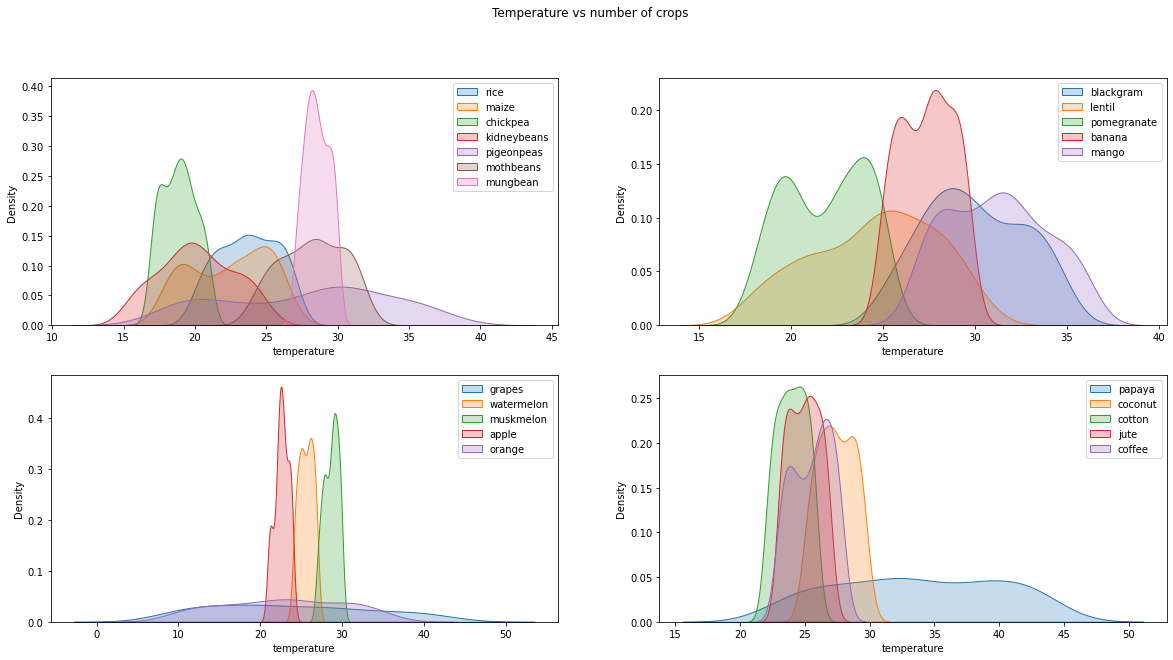

In [6]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20,10))
fig.suptitle("Temperature vs number of crops");
start = 0
end = 7
for row in range(2):
    for col in range(2):
        for label in labels[start:end]:
            sns.kdeplot(df['temperature'][df['label']== label], shade=True, ax=ax[row][col])
        ax[row][col].legend(labels[start:end])
        start = end
        end = start + 5 
        #ax[row][col].set_xlim(0,20)
plt.show()

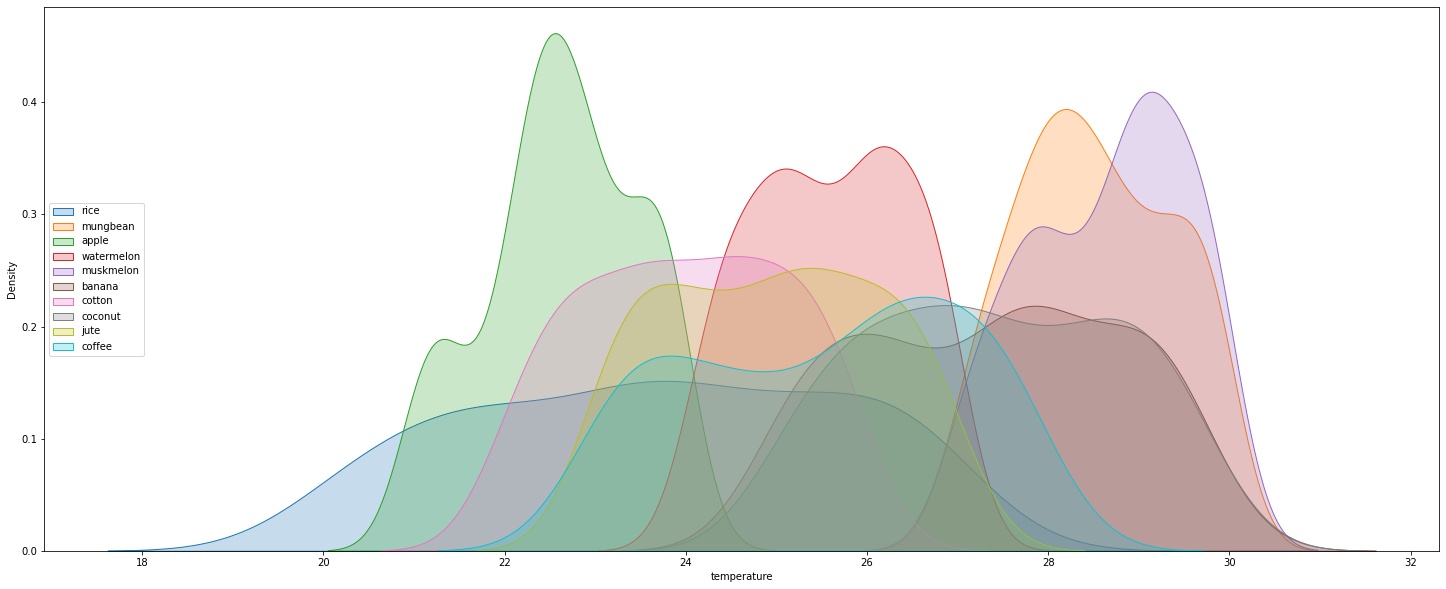

In [7]:
plt.figure(figsize=(25,10))
labels_20_to_30 = ['rice', 'mungbean', 'apple', 'watermelon', 'muskmelon', 'banana', 'cotton', 'coconut', 'jute', 'coffee']
for label in labels_20_to_30:
    sns.kdeplot(df['temperature'][df['label'] == label], shade=True)
plt.legend(labels_20_to_30, loc='center left')
plt.show()

In [8]:
labels_25_and_above = ['blackgram', '']

<Figure size 14400x7200 with 0 Axes>

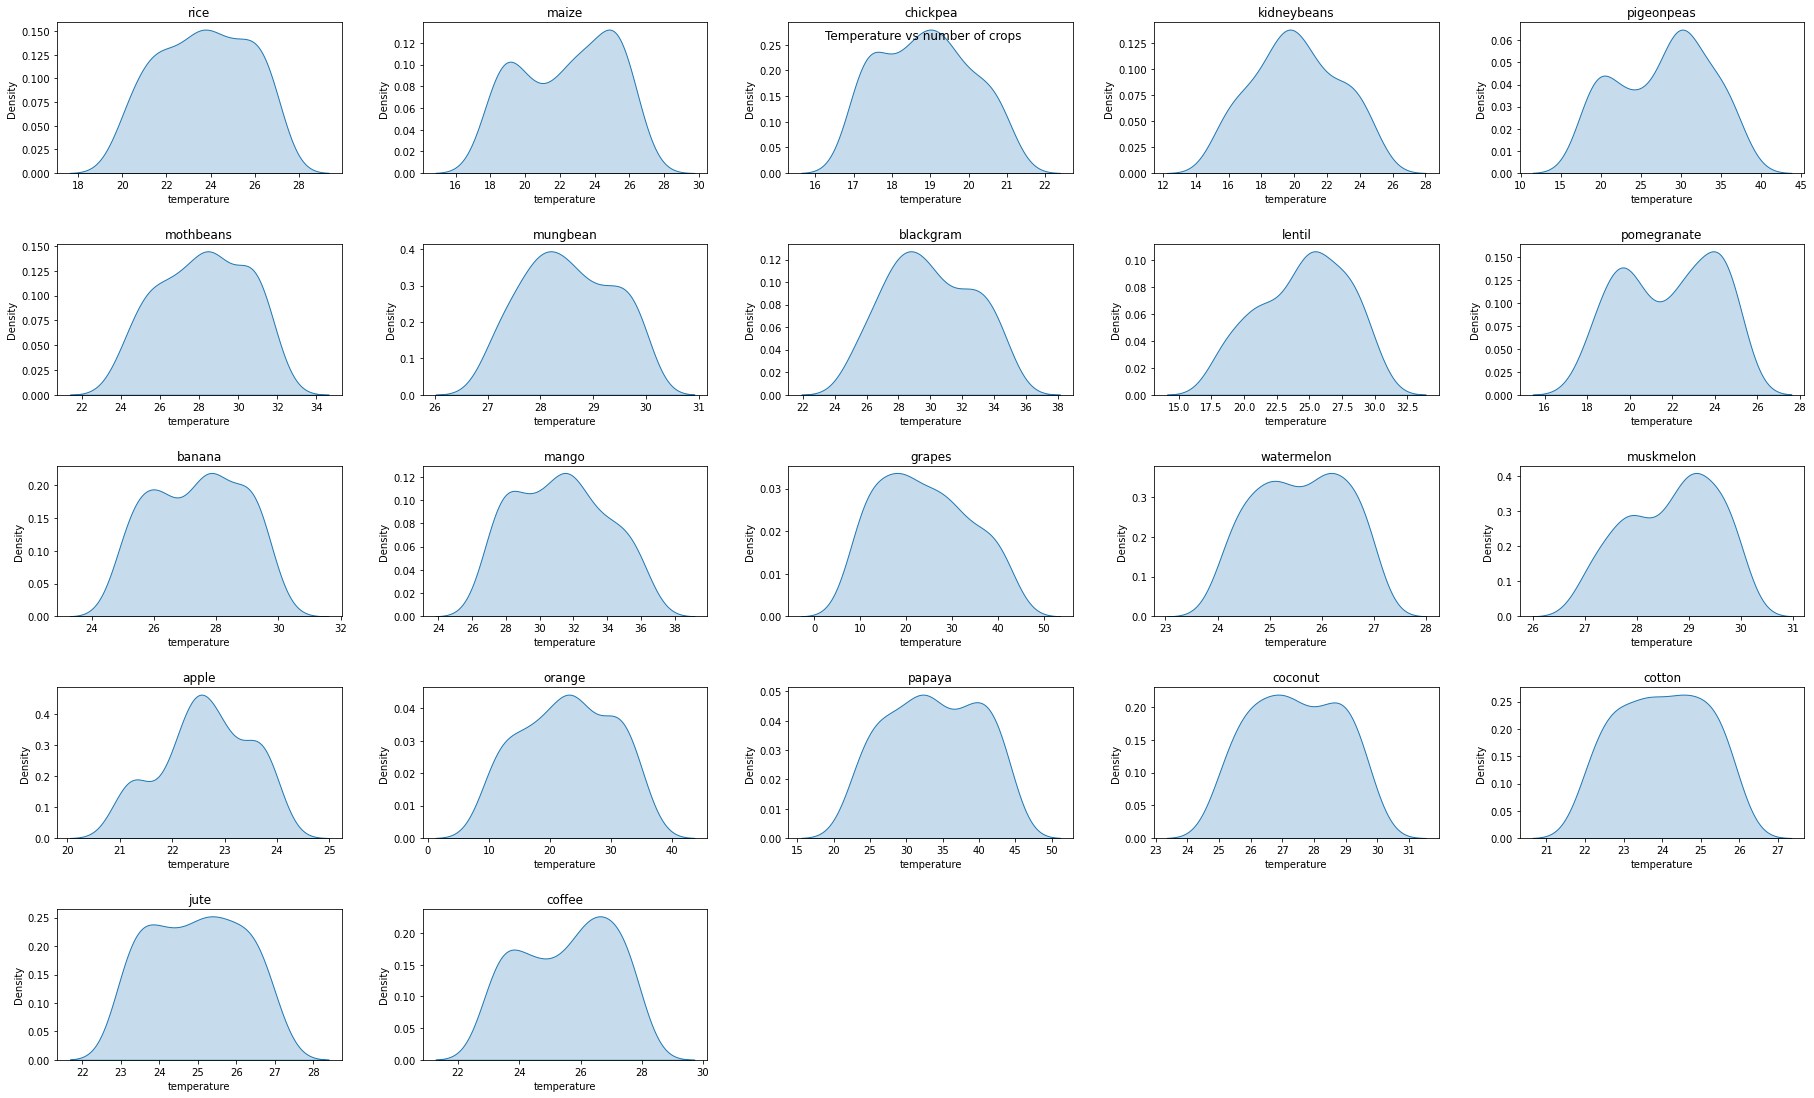

In [9]:
plt.figure(figsize=(200,100))
fig, axes = plt.subplots(5, 5, sharex=False, sharey=False, figsize=(25,15))
fig.tight_layout(h_pad=5, w_pad=5)
#plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
fig.suptitle("Temperature vs number of crops");

i = 0
for row in range(5):
    colsize = 5 if row < 4 else 2
    for col in range(colsize):
        sns.kdeplot(df['temperature'][df['label']== labels[i]], shade=True, ax=axes[row][col])
        axes[row][col].set_title(labels[i])
#       axes[row][col].legend(labels[i])
        i += 1
fig.delaxes(axes[4][2])
fig.delaxes(axes[4][3])
fig.delaxes(axes[4][4])
plt.show()

In [10]:
a = []
for label in labels:
    humidities = df[df['label']==label]['humidity'].to_numpy()
    _min = np.min(humidities)
    _max = np.max(humidities)
    _range = _max - _min
    mean = np.mean(humidities)
    median = np.median(humidities)
    a.append([label, _min, _max, mean, median, _range])
pd.DataFrame(np.array(a), columns=['label', 'Min of humidities', 'Max of humidities', 'mean of humidities', 'median of humidities', 'Humidities Range']).sort_values(['Min of humidities', 'Humidities Range'])

,label,Min of humidities,Max of humidities,mean of humidities,median of humidities,Humidities Range
2,chickpea,14.25803981,19.96978871,16.8604394237,16.65863387,5.7117489
3,kidneybeans,18.09224048,24.96969858,21.605356729499995,21.348735025,6.877458099999998
4,pigeonpeas,30.40046769,69.69141302,48.0616330847,47.19517981,39.29094533
5,mothbeans,40.00933429,64.95585424,53.16041802789999,53.66819039,24.946519949999995
11,mango,45.02236377,54.9640534,50.1565726953,50.281614645000005,9.941689629999999
21,coffee,50.04557009,69.94807345,58.86984630029999,57.648082825,19.902503359999997
1,maize,55.28220433,74.82913698,65.0922494467,65.30384518,19.546932650000002
7,blackgram,60.06534859,69.96100028,65.1184255887,65.02672305499999,9.895651689999994
8,lentil,60.09116626,69.92375891,64.80478467849998,64.09462636,9.832592650000002
20,jute,70.88259632,89.89106506,79.6398642063,79.46920523,19.008468739999998


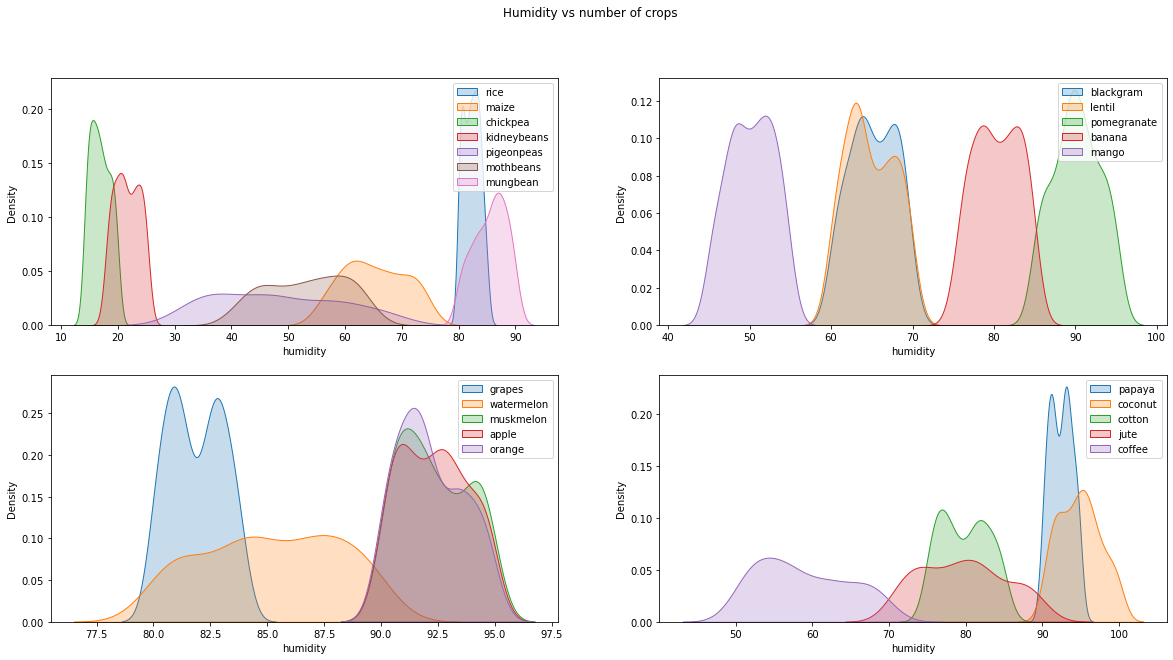

In [11]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20,10))
fig.suptitle("Humidity vs number of crops");
start = 0
end = 7
for row in range(2):
    for col in range(2):
        for label in labels[start:end]:
            sns.kdeplot(df['humidity'][df['label']== label], shade=True, ax=ax[row][col])
        ax[row][col].legend(labels[start:end])
        start = end
        end = start + 5 
        #ax[row][col].set_xlim(0,20)
plt.show()

<Figure size 14400x7200 with 0 Axes>

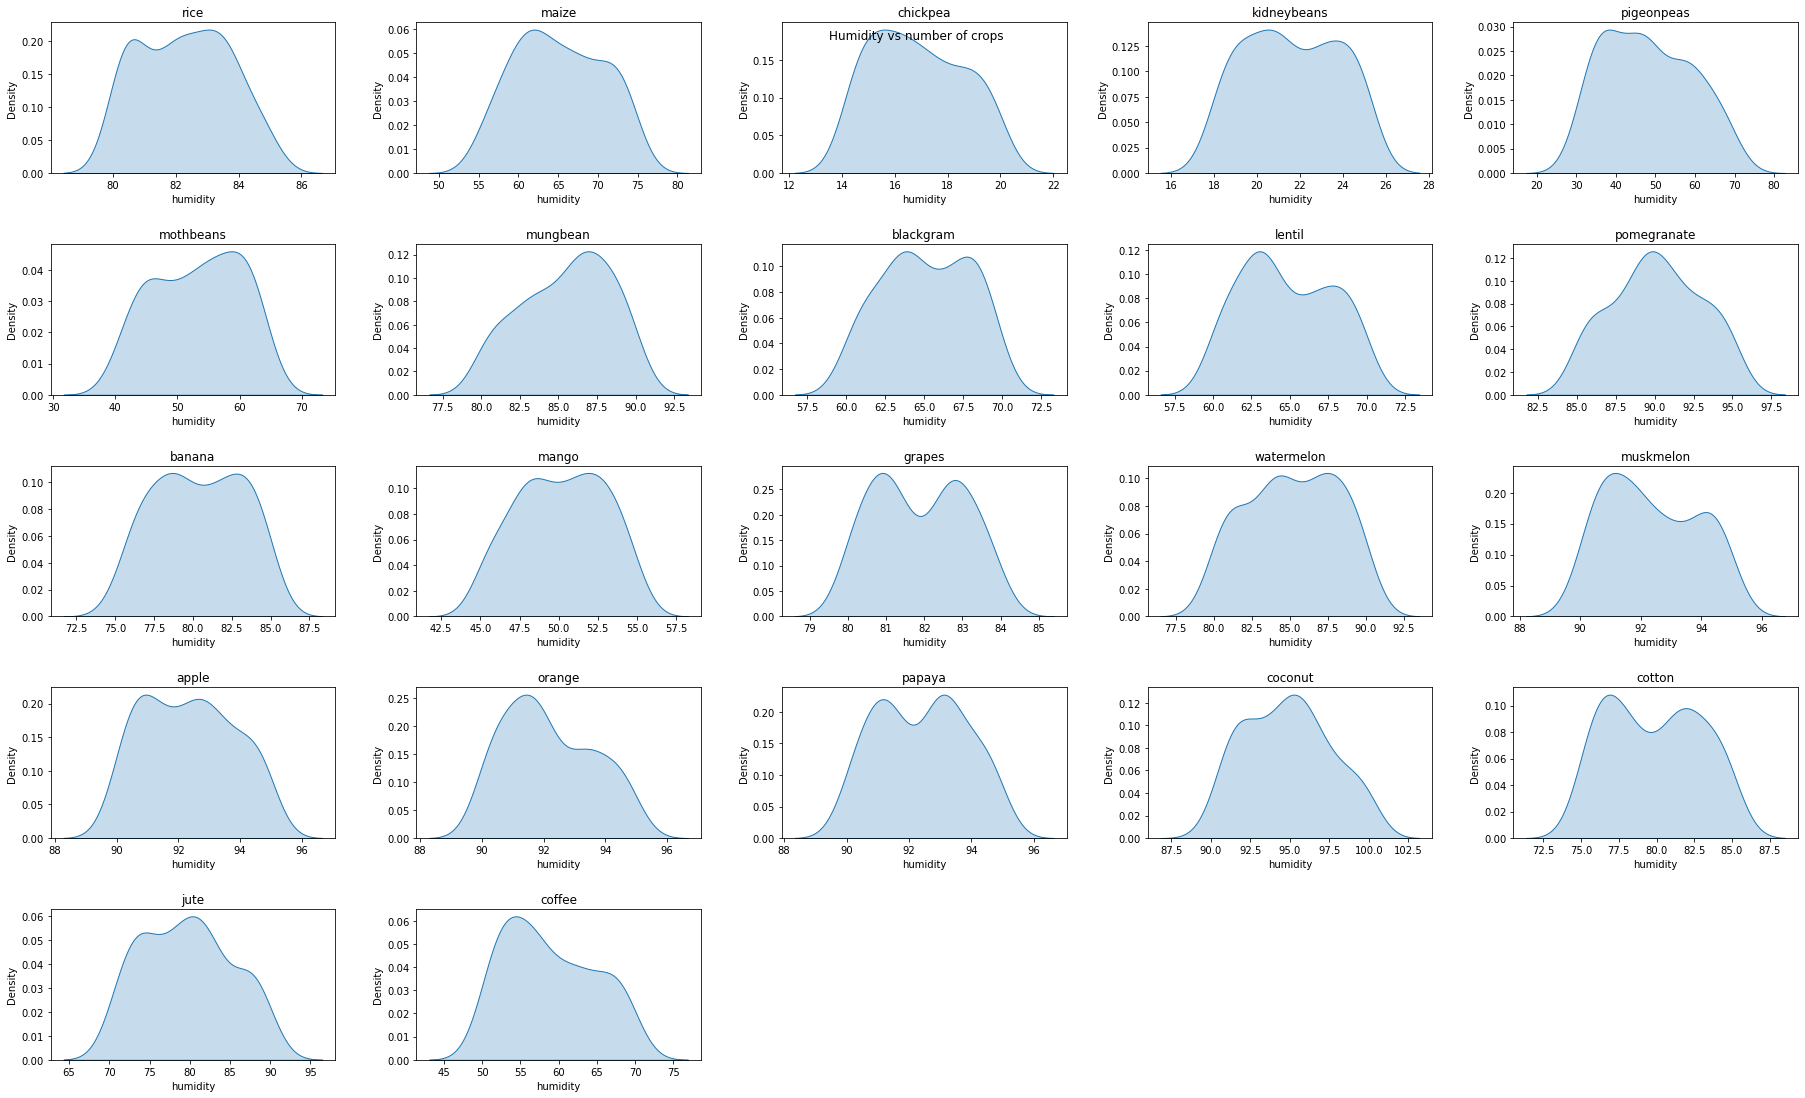

In [12]:
plt.figure(figsize=(200,100))
fig, axes = plt.subplots(5, 5, sharex=False, sharey=False, figsize=(25,15))
fig.tight_layout(h_pad=5, w_pad=5)
#plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
fig.suptitle("Humidity vs number of crops");

i = 0
for row in range(5):
    colsize = 5 if row < 4 else 2
    for col in range(colsize):
        sns.kdeplot(df['humidity'][df['label']== labels[i]], shade=True, ax=axes[row][col])
        axes[row][col].set_title(labels[i])
#       axes[row][col].legend(labels[i])
        i += 1
fig.delaxes(axes[4][2])
fig.delaxes(axes[4][3])
fig.delaxes(axes[4][4])
plt.show()

In [13]:
a = []
for label in labels:
    rainfall = df[df['label']==label]['rainfall'].to_numpy()
    _min = np.min(rainfall)
    _max = np.max(rainfall)
    _range = _max - _min
    mean = np.mean(rainfall)
    median = np.median(rainfall)
    a.append([label, _min, _max, mean, median, _range])
pd.DataFrame(np.array(a), columns=['label', 'Min of rainfall', 'Max of rainfall', 'mean of rainfall', 'median of rainfall', 'Rainfall Range'])

,label,Min of rainfall,Max of rainfall,mean of rainfall,median of rainfall,Rainfall Range
0,rice,182.5616319,298.5601175,236.18111359399998,233.1198594,115.99848559999998
1,maize,60.65171481,109.7515385,84.76698766300002,83.471553265,49.099823689999994
2,chickpea,65.11365631,94.78189594,80.0589772605,79.69228207,29.668239630000002
3,kidneybeans,60.27552528,149.7441028,105.91977754210002,107.39939195,89.46857752000001
4,pigeonpeas,90.05422663,198.8298806,149.4575638135,154.3105065,108.77565397
5,mothbeans,30.92014047,74.44330654,51.198487045700006,51.182737945,43.523166069999995
6,mungbean,36.12042927,59.87232071,48.403600902899996,49.028170610000004,23.751891439999994
7,blackgram,60.41790253,74.91559514,67.88415118319999,68.293539015,14.497692609999994
8,lentil,35.03484812,54.93937710000001,45.680454204,46.553254515,19.90452898000001
9,pomegranate,102.5184759,112.4750941,107.52844239699999,107.58820075,9.956618200000008


In [14]:
a = []
for label in labels:
    ph = df[df['label']==label]['ph'].to_numpy()
    _min = np.min(ph)
    _max = np.max(ph)
    _range = _max - _min
    mean = np.mean(ph)
    median = np.median(ph)
    a.append([label, _min, _max, mean, median, _range])
pd.DataFrame(np.array(a), columns=['label', 'Min of ph', 'Max of ph', 'mean of ph', 'median of ph', 'ph Range'])

,label,Min of ph,Max of ph,mean of ph,median of ph,ph Range
0,rice,5.005306977,7.868474653,6.425470922139999,6.363803588,2.8631676759999998
1,maize,5.513697923,6.995843776,6.245189722399999,6.259180943,1.4821458530000005
2,chickpea,5.988992796000002,8.868741443,7.33695662374,7.3565365365,2.8797486469999978
3,kidneybeans,5.502999119,5.99812453,5.749410585870001,5.7452827165,0.49512541100000007
4,pigeonpeas,4.548202098,7.445444882999999,5.794174879789999,5.690465661999999,2.8972427849999987
5,mothbeans,3.504752314,9.93509073,6.83117408269,7.2191361315,6.430338416000001
6,mungbean,6.218923893,7.199495367999999,6.72395694037,6.7038904845,0.9805714749999987
7,blackgram,6.500144962,7.775306272000001,7.133951629480002,7.165239853,1.2751613100000005
8,lentil,5.91645379,7.841496029,6.9279315716099985,6.9541777625000005,1.9250422389999997
9,pomegranate,5.561851831,7.199504273,6.4291718411700005,6.430714609000001,1.6376524419999994
